# CATS AND DOGS - Kaggle

In [3]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers,applications,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path=r"./data/cats_dogs_2/training_set_500/training_set_500/training_set_500/"
dataset=tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    image_size=(224,224),
    batch_size=34,
    label_mode='int',
    shuffle=True,
)

X=[]
y=[]
for images,labels in dataset:
    X.append(images.numpy())
    y.append(labels.numpy())

X=np.concatenate(X,axis=0)
y=np.concatenate(y,axis=0)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(dataset.class_names)

2025-05-31 15:03:48.978174: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-31 15:03:49.519145: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-31 15:03:49.521531: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-31 15:03:51.599856: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Invalid MIT-MAGIC-COOKIE-1 key

Found 1002 files belonging to 2 classes.


2025-05-31 15:03:55.986905: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-05-31 15:03:55.990659: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


(801, 224, 224, 3)
(801,)
(201, 224, 224, 3)
(201,)
['Cat', 'Dog']


In [4]:
x_train,x_test=x_train/255.0,x_test/255.0
datagen=ImageDataGenerator(
    rotation_range=7,
    width_shift_range=0.5,
    height_shift_range=0.5,
    shear_range=0.7,
    horizontal_flip=True,
)

datagen.fit(x_train)

In [5]:
%%time 

vgg_base=applications.VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))
vgg_base.trainable=False
model=models.Sequential([
    vgg_base,
    layers.Flatten(),
    layers.Dense(256,activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.3),
    layers.Dense(10,activation='softmax')
    
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(datagen.flow(x_train,y_train,batch_size=32),epochs=10,validation_data=(x_test,y_test))

Epoch 1/10


2025-05-31 15:04:08.199262: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2025-05-31 15:04:08.545997: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.


 1/26 [>.............................] - ETA: 7:11 - loss: 2.8000 - accuracy: 0.0625

2025-05-31 15:04:23.818332: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2025-05-31 15:04:24.193449: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.


 2/26 [=>............................] - ETA: 5:54 - loss: 2.8385 - accuracy: 0.2031

2025-05-31 15:04:38.561442: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.


26/26 [==============================] - 503s 19s/step - loss: 3.4841 - accuracy: 0.5368 - val_loss: 0.5194 - val_accuracy: 0.8060
Epoch 2/10
26/26 [==============================] - 502s 19s/step - loss: 1.0428 - accuracy: 0.7004 - val_loss: 0.4631 - val_accuracy: 0.8159
Epoch 3/10
26/26 [==============================] - 373s 15s/step - loss: 0.6278 - accuracy: 0.7303 - val_loss: 0.4489 - val_accuracy: 0.8159
Epoch 4/10
26/26 [==============================] - 368s 14s/step - loss: 0.5050 - accuracy: 0.7678 - val_loss: 0.3506 - val_accuracy: 0.8657
Epoch 5/10
26/26 [==============================] - 367s 14s/step - loss: 0.4860 - accuracy: 0.7690 - val_loss: 0.3462 - val_accuracy: 0.8657
Epoch 6/10
26/26 [==============================] - 365s 14s/step - loss: 0.4162 - accuracy: 0.7990 - val_loss: 0.5001 - val_accuracy: 0.7761
Epoch 7/10
26/26 [==============================] - 368s 15s/step - loss: 0.3935 - accuracy: 0.8215 - val_loss: 0.3045 - val_accuracy: 0.9005
Epoch 8/10
26/26 

7/7 [==============================] - 73s 10s/step
Test Accuracy: 0.8805969953536987

Classification Report:
               precision    recall  f1-score   support

         Cat       0.91      0.84      0.88       101
         Dog       0.85      0.92      0.88       100

    accuracy                           0.88       201
   macro avg       0.88      0.88      0.88       201
weighted avg       0.88      0.88      0.88       201



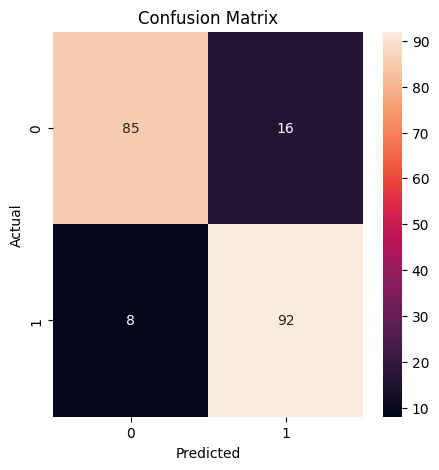

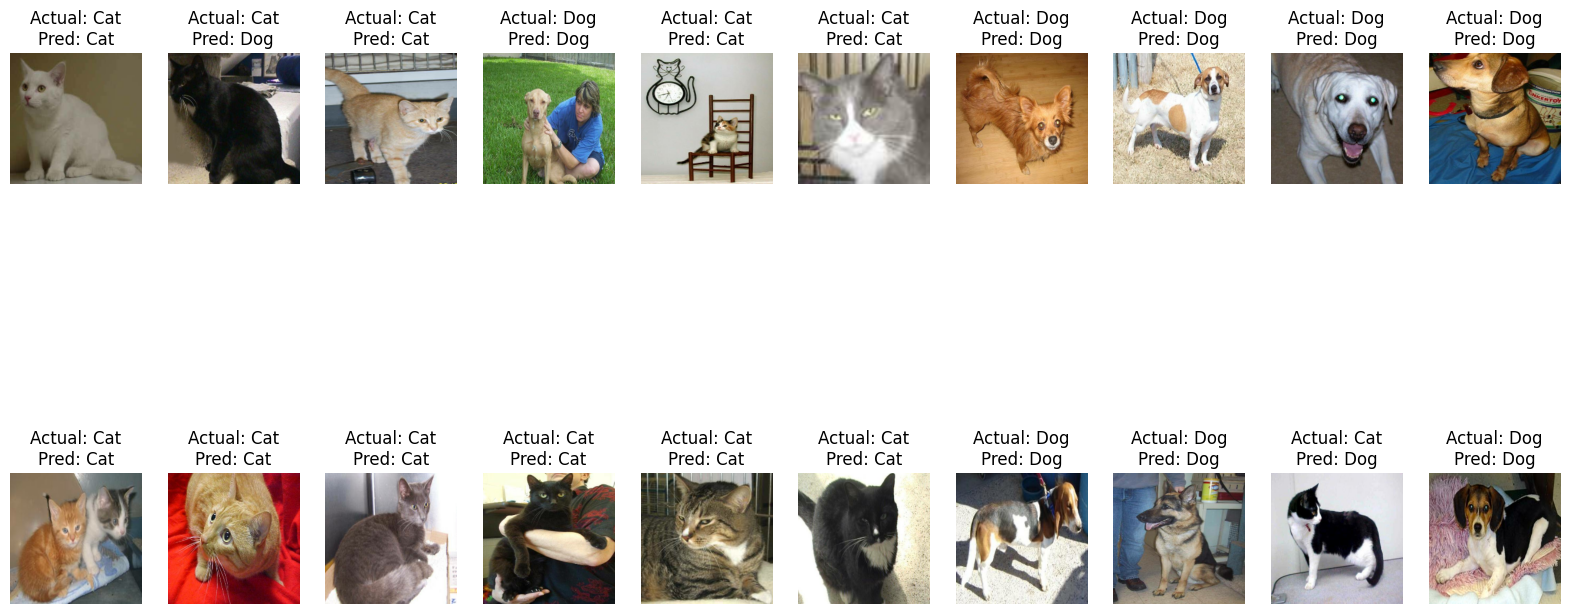

In [6]:
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def model_evaluate(model, x_test, y_test, class_names):
    y_pred_proba = model.predict(x_test)
    y_pred = y_pred_proba.argmax(axis=1)
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print('Test Accuracy:', test_acc)
    print('\nClassification Report:\n', classification_report(y_test, y_pred, target_names=class_names))

    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    
    plt.figure(figsize=(20, 10))
    for i in range(20):
        plt.subplot(2, 10, i+1)
        plt.imshow(x_test[i])  
        plt.title(f"Actual: {class_names[y_test[i]]}\nPred: {class_names[y_pred[i]]}")
        plt.axis("off")
    
    plt.show()
class_names = ['Cat', 'Dog']
model_evaluate(model, x_test, y_test, class_names)
